# Figure 3

In [1]:
%matplotlib notebook

In [2]:
#### Loads relevant Python libraries ####

import csv
import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp

In [3]:
def px_remove(array, x, y):
    """ Function to remove hot pixels in STXM images due to synchrotron beam topup events 
    Sets hot pixel value to the average value of the 4 nearest pixels."""

    temp = array
    temp[y, x] = (temp[y + 1, x] + temp[y - 1, x] + temp[y, x + 1] + temp[y, x - 1]) / 4
    return temp

# Loading the Simulation Data

In [4]:
# Load Helical Simulation
helical_sim = np.loadtxt("m_Bz_010_mT.txt")
helical_sim = np.rot90(helical_sim)

# Load Skyrmion Simulation
skyrmion_sim = np.loadtxt("m_Bz_200_mT.txt")

# Load Conical Simulation
conical_sim = np.loadtxt("m_Bx_200_mT.txt")

# Loading Holography Images

In [5]:
### Holographic reconstruction performed in another python notebook ###

# Load Skyrmion Holo Image
skyrmion_holo = np.loadtxt('xholo_skyrmions.csv', dtype='float', delimiter=',')

# Load Helical Holo Image
helical_holo = np.loadtxt('xholo_helix.csv', dtype='float', delimiter=',')

# Load conical Holo Image
conical_holo = np.loadtxt('xholo_cone.csv', dtype='float', delimiter=',')

# Loading STXM Images

In [6]:
### Load Skyrmion STXM Image ###

raw = np.loadtxt('stxm_skyrmion.xim')

# Removes hot pixels caused by synchrotron topup events
raw = px_remove(raw, 13, 57)
raw = px_remove(raw, 29, 13)
raw = px_remove(raw, 68, 87)
raw = px_remove(raw, 20, 37)
raw = px_remove(raw, 27, 17)
raw = px_remove(raw, 73, 53)
raw = px_remove(raw, 72, 53)
raw = px_remove(raw, 71, 53)
raw = px_remove(raw, 74, 53)
raw = px_remove(raw, 75, 53)
raw = px_remove(raw, 69, 53)
raw = px_remove(raw, 70, 53)

#Creates background image by applying Gaussian filter to raw image.
#See Fig. 4 file for demonstration of this process.
background = sp.ndimage.gaussian_filter(raw, 3)

#Subtracts background from the raw image to remove contrast from thickness variation. Normalises result.
subtracted = raw - background
magnetic1 = (subtracted-np.amin(subtracted)) / np.amax(subtracted)

In [7]:
### Load Helical STXM Image ###

raw=np.loadtxt('stxm_helical.xim')

#Removes hot pixels caused by synchrotron topup events
raw = px_remove(raw, 9, 37)
raw = px_remove(raw, 64, 40)

#Creates background image by applying Gaussian filter to raw image.
background = sp.ndimage.gaussian_filter(raw, 3)

#Subtracts background from the raw image to remove contrast from thickness variation. Normalises result.
subtracted = raw - background
helical_stxm1 = (subtracted-np.amin(subtracted)) / np.amax(subtracted)
helical_stxm1 = np.flipud(helical_stxm1)

In [8]:
### Load conical STXM Image ###

raw = np.loadtxt('stxm_conical.xim')

#Removes hot pixels caused by synchrotron topup events
raw = px_remove(raw, 2, 3)

#Creates background image by applying Gaussian filter to raw image.
background = sp.ndimage.gaussian_filter(raw, 3)

#Subtracts background from the raw image to remove contrast from thickness variation. Normalises result.
subtracted = raw - background
conical_stxm = (subtracted-np.amin(subtracted)) / np.amax(subtracted)

# Example of Hot Pixel Removing

<IPython.core.display.Javascript object>


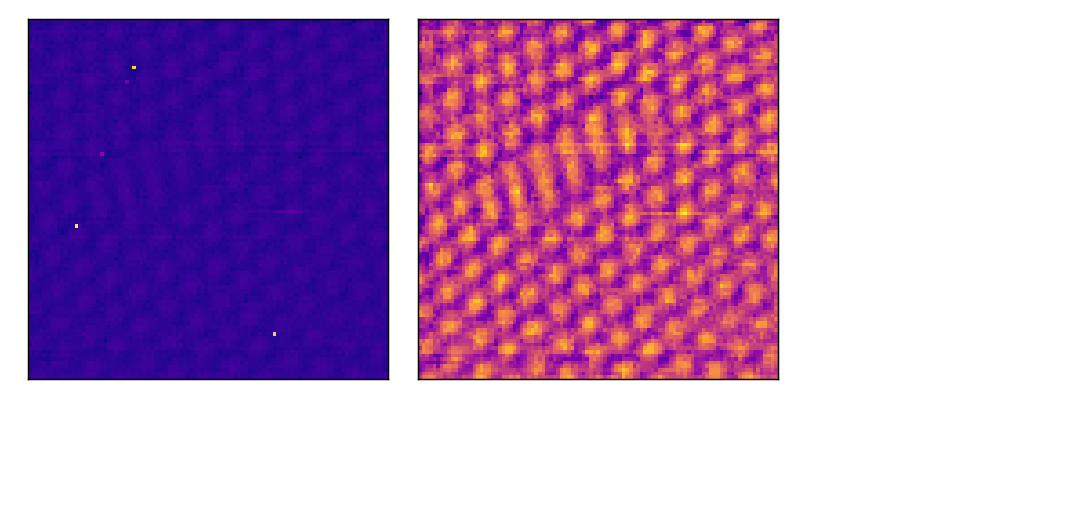

In [9]:
### Creating Skyrmion STXM Image with hot pixels kept in. ###
# Load data
raw_hot = np.loadtxt('stxm_skyrmion.xim')
#Creates background image by applying Gaussian filter to raw image.
#See Fig. 4 file for demonstration of this process.
background_hot = sp.ndimage.gaussian_filter(raw_hot, 3)

#Subtracts background from the raw image to remove contrast from thickness variation. Normalises result.
subtracted_hot = raw_hot - background_hot
magnetic1_hot = (subtracted_hot - np.amin(subtracted_hot)) / np.amax(subtracted_hot)

# Create Figure
plt.figure(figsize=(6, 3))

# Plots the image without hot pixels removed.
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
plt.imshow(magnetic1_hot, interpolation='none', cmap='plasma_r')
plt.xticks([])
plt.yticks([])

# Plots the image with hot pixels removed.
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

#XXX plt.imshow(sp.ndimage.gaussian_filter(skyrmion_stxm[0:99,0:99],0.5),interpolation='none',cmap = 'plasma_r')
plt.imshow(sp.ndimage.gaussian_filter(magnetic1[0:99, 0:99], 0.5), interpolation='none', 
           cmap='plasma_r')

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

# Loading LTEM Images

In [10]:
# Load Skyrmion LTEM Image
helical_ltem = mpimg.imread('LTEM_Helices.jpg')
skyrmion_ltem = mpimg.imread('LTEM_SkL.jpg')

# Plotting Figure 3

<IPython.core.display.Javascript object>


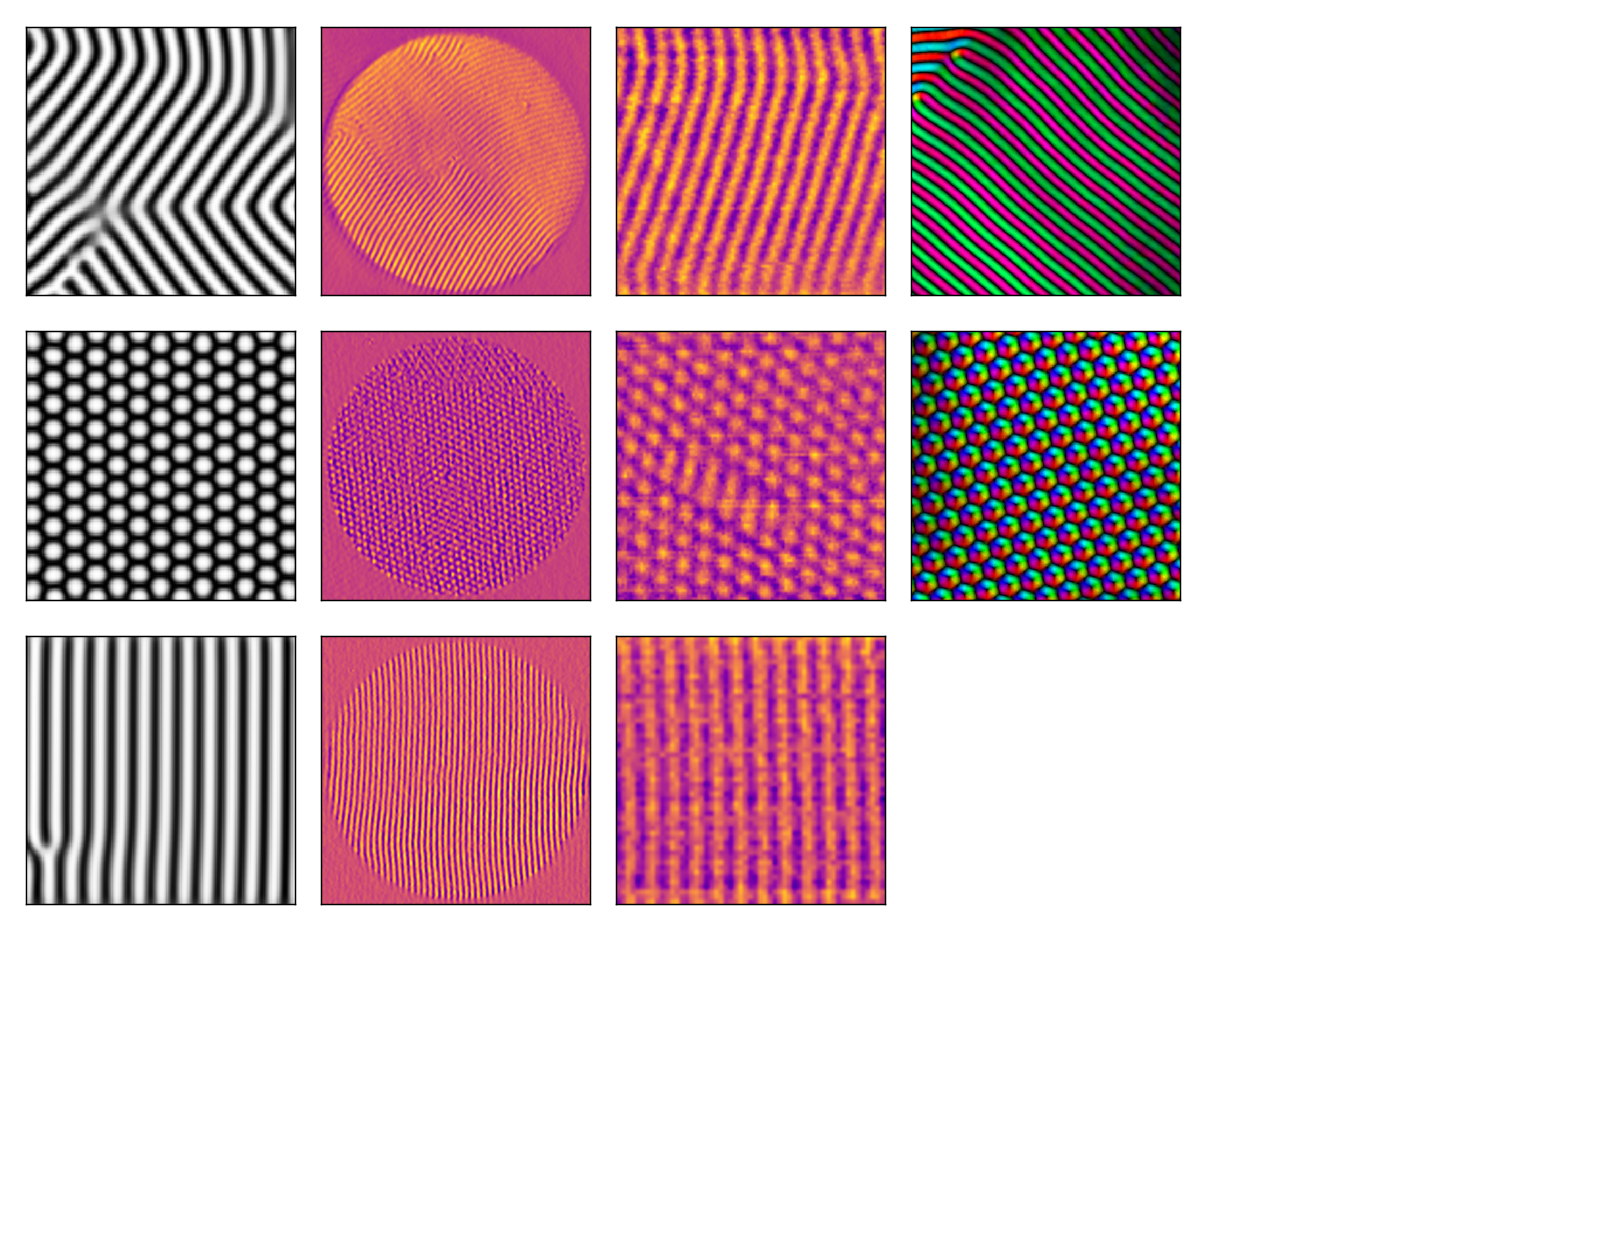

In [11]:
plt.figure(figsize=(9, 7))

#### Plots Simulatied Images ####
ax1 = plt.subplot2grid((3, 4), (0, 0), rowspan=1, colspan=1)
plt.imshow(helical_sim[10:240, 10:240],interpolation='none', cmap='Greys')
plt.xticks([])
plt.yticks([])

ax2 = plt.subplot2grid((3, 4), (1, 0), rowspan=1, colspan=1)
plt.imshow(skyrmion_sim[10:240, 10:240],interpolation='none', cmap='Greys')
plt.xticks([])
plt.yticks([])

ax3 = plt.subplot2grid((3, 4), (2, 0), rowspan=1, colspan=1)
plt.imshow(conical_sim[10:240, 10:240],interpolation='none', cmap='Greys')
plt.xticks([])
plt.yticks([])


#### Plots Holography Images ####
ax4 = plt.subplot2grid((3, 4), (0, 1), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(helical_holo[5:145, 5:145], 0), interpolation='bicubic', cmap='plasma_r')
plt.clim(vmin=-1.2,vmax=0.8)
#plt.colorbar()
plt.xticks([])
plt.yticks([])

ax5 = plt.subplot2grid((3, 4), (1, 1), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(skyrmion_holo[5:145, 5:145], 0), interpolation='bicubic', cmap='plasma_r')
plt.clim(vmin=-0.25,vmax=0.25)
plt.xticks([])
plt.yticks([])

ax6 = plt.subplot2grid((3, 4), (2, 1), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(conical_holo[5:145,5:145], 0), interpolation='bicubic', cmap='plasma_r')
plt.clim(vmin=-0.5,vmax=0.5)
plt.xticks([])
plt.yticks([])


#### Plots STXM Images ####
ax7 = plt.subplot2grid((3, 4), (0, 2), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(helical_stxm1[0:98, 0:98], 0.5), interpolation='hamming',
           origin='lower', cmap='plasma_r')
plt.xticks([])
plt.yticks([])

ax8 = plt.subplot2grid((3, 4), (1, 2), rowspan=1, colspan=1)
#XXX plt.imshow(sp.ndimage.gaussian_filter(skyrmion_stxm[0:99, 0:99], 0.5),interpolation='hamming',origin='lower', cmap='plasma_r')
plt.imshow(sp.ndimage.gaussian_filter(magnetic1[0:99, 0:99], 0.5),interpolation='hamming',
           origin='lower', cmap='plasma_r')

plt.xticks([])
plt.yticks([])

ax9= plt.subplot2grid((3, 4), (2, 2), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(conical_stxm[0:55,5:60], 0.5),
           interpolation='hamming', origin='lower', cmap='plasma_r')
plt.xticks([])
plt.yticks([])


#### Plots LTEM Images ####

ax10= plt.subplot2grid((3, 4), (0, 3), rowspan=1, colspan=1)
plt.imshow(helical_ltem)
plt.xticks([])
plt.yticks([])

ax11= plt.subplot2grid((3, 4), (1, 3), rowspan=1, colspan=1)
plt.imshow(skyrmion_ltem)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('Figure_3.png', dpi=300)
plt.savefig('Figure_3.pdf')